In [1]:
# Import dati dalla prof
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import RisolviSis as RS
import matplotlib.pyplot as plt
dati = loadmat('testE.mat')
A = dati["A"]
b = dati["b"]


### Jacobi

In [6]:
# Definito anche metodo di decomposizione in cui la matrice di partenza viene
# decomposta in 3 matrici che sono poi relazionate diversamente fra loro: A = D + E + F.
# Per Jacobi vale la relazione: M = D e N = -(E + F).
# L’algoritmo di Jacobi è definito se gli elementi diagonali di A sono diversi da 0 (a meno
# che A sia non singolare e quindi riordinabile affiché il metodo sia applicabile) e
# ogni elemento dell’iterato è indipendente dagli altri, pertanto il metodo
# e ' parallelizzabile.
# Il metodo non restituisce una soluzione ottima ma converge ad una soluzione definibile
# ottima (approssimata).
def jacobi(A, b, x0, toll, itmax):
    n = A.shape[0]
    # Estraggo la diagonale dalla matrice A, costruisco la matrice diagonale
    d = np.diag(A)
    D = np.diag(d) #usare np.diag() su un vettore colonna genera una matrice diagonale con tutti gli elementi sulla diagonale
    # Creo la matrice triangolare inferiore da A, -1 perchè escludo la diagonale
    E = np.tril(A, - 1)
    # Estraggo dalla matrice A la sua matrice triangolare superiore,
    # con diagonale esclusa
    F = np.triu(A, 1)

    # Decomposizione adottata nel metodo di Jacobi: si tiene a mente che M = D
    N = -(E + F)
    invM = np.diag(1 / d) #inversa di M
    T = np.dot(invM, N) #matrice di iterazione

    # Controllo il raggio spettrale che rispetti le regole di ammissibilità della soluzione.
    # Si utilizza la condizione sufficiente come valida condizione di ricerca di una soluzione.
    # Cercando il raggio spettrale, devo vedere che questo sia minore di 1
    # affinché ci sia una veloce convergenza del metodo iterativo.

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale: ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni.
    # Tengo traccia del vettore degli errori per poi fare un grafico
    # rappresentativo.
    it = 0
    err_vet = []
    err = 1000

    while it <= itmax and err >= toll:
        x = (b + np.dot(N, x0)) / d.reshape(n, 1) # equivale a  (T@x0 + invM@b)
        # Se c'è convergenza le soluzioni non cambiano più
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        # Al passo successivo, x0 sarà la x del passo precedente
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:  0.9997193113493894
Iterazioni:   101


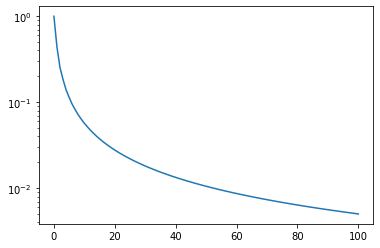

In [7]:
n = A.shape[0]

# Posso scegliere un qualunque vettore iniziale
x0 = np.zeros((n, 1))
# la tolleranza e il numero max di iterazioni li impostiamo perchè il
# metodo converge ad una soluzione, non trova la soluzione al sistema
# lineare. Solitamente si basa su una percentuale di errore da cui
# sono affetti i dati.
itmax = 100
toll = 1e-8

xJ, itJ, err_vetJ = jacobi(A, b, x0, toll, itmax)
#print("Soluzione:   ", xJ)
print("Iterazioni:  ", itJ)

plt.semilogy(np.arange(itJ), err_vetJ)
plt.show()


### Gauss-Seidel

In [37]:
# Definito anche metodo di decomposizione in cui la matrice di partenza viene
# decomposta in 3 matrici che sono poi relazionate diversamente fra loro: A = D + E + F.
# Per Gauss-Siedel vale la relazione: M = E + D e N = -F.
# Gauss-Siedel converge sicuramente se la matrice e' simmetrica e definita positiva.
# Questo metodo utilizza per calcolare la nuova componente di una iterazione tutte quelle
# calcolate fino a quel punto: come conseguenza di ciò l'algoritmo non è parallelizzabile.
# Il metodo non restituisce una soluzione ottima ma converge ad una soluzione definibile
# ottima (approssimata).
def gauss_seidel(A, b, x0, toll, itmax):
    d = np.diag(A)
    # Estraggo la diagonale dalla matrice A, costruisco la matrice diagonale
    D = np.diag(d)
    # Creo la matrice triangolare inferiore da A, -1 perchè escludo la diagonale
    E = np.tril(A, - 1)
    # Estraggo dalla matrice A la sua matrice triangolare superiore,
    # con diagonale esclusa
    F = np.triu(A, 1)

    # Decomposizione adottata nel metodo di Gauss-Siedel:
    M = D + E
    N = -F

    # Condizione necessaria e sufficiente alla convergenza.
    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo
    invM = np.linalg.inv(M)
    T = np.dot(invM, N)

    # Controllo il raggio spettrale che rispetti le regole di ammissibilità della soluzione.
    # Si utilizza la condizione sufficiente come valida condizione di ricerca di una soluzione.
    autT = np.linalg.eigvals(T)
    rho = np.max(np.abs(autT))
    print("Raggio spettrale: ", rho)
    if (rho > 1):
        print("Raggio spettrale maggiore di 1, nessuna soluzione")

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni.
    # Tengo traccia del vettore degli errori per poi fare un grafico
    # rappresentativo.
    it = 0
    err_vet = []
    err = 1000
    
    while it <= itmax and err >= toll:
        temp = b - np.dot(F, x0)
        x, flag = RS.Lsolve(M, temp) # equivale a T@x0 + invM@b
        err = np.linalg.norm(x - x0) / np.linalg.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet


Raggio spettrale:  0.9994387014848953
Iterazioni GS:    101


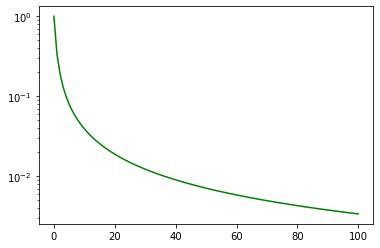

In [38]:
# Posso scegliere un qualunque vettore iniziale
n = A.shape[0]
x0 = np.zeros((n, 1))
# la tolleranza e il numero max di iterazioni li impostiamo perchè il
# metodo converge ad una soluzione, non trova la soluzione al sistema
# lineare. Solitamente si basa su una percentuale di errore da cui
# sono affetti i dati.
itmax = 100
toll = 1e-8

xG, itG, err_vetG = gauss_seidel(A, b, x0, toll, itmax)
#print("Soluzione GS:    ", xG)
print("Iterazioni GS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG,'g')
plt.show()


### Gauss-Seidel SOR

In [4]:
# Definito anche metodo di decomposizione in cui la matrice di partenza viene
# decomposta in 3 matrici che sono poi relazionate diversamente fra loro: A = D + E + F.
# Per Gauss-Siedel SOR vale la relazione: M = E + D e N = -F.
# Gauss-Siedel SOR converge sicuramente se la matrice e' simmetrica e definita positiva.
# Questo metodo utilizza per calcolare la nuova componente di una iterazione tutte quelle
# calcolate fino a quel punto: come conseguenza di ciò l'algoritmo non è parallelizzabile.
# Il metodo non restituisce una soluzione ottima ma converge ad una soluzione definibile
# ottima (approssimata).
# A differenza di Gauss-Siedel classico, il metodo subisce una accelerazione verso la
# soluzione ottima sfruttando un parametro omega di rilassamento.
def gauss_seidel_sor(A, b, x0, omega, toll, itmax):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    Dinv = np.diag(1/d)
    # Estraggo la diagonale dalla matrice A, costruisco la matrice diagonale.
    E = np.tril(A, -1)
    # Creo la matrice triangolare inferiore da A, -1 perchè escludo la diagonale.
    F = np.triu(A, 1)

    # Decomposizione adottata nel metodo di Gauss-Siedel SOR: devo introdurre
    # un parametro omega che riduca il più possibile il raggio spettrale.
    # Questo si fa' perché il problema principale della convergenza del metodo
    # e' legato al mal condizionamento di A, che causa il rallentamento oppure
    # la perdita della convergenza stessa del metodo.
    M_omega = D + omega * E
    N_omega = (1 - omega) * D - omega * F
    T = np.dot(np.linalg.inv(M_omega), N_omega)
    M = D + E
    N = -F

    # Il raggio spettrale di una matrice è il suo autovalore di modulo massimo.
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    # Cuore dell'algoritmo: inizializzo il contatore delle iterazioni.
    # Tengo traccia del vettore degli errori per poi fare un grafico
    # rappresentativo.
    it = 0
    x_old = x0.copy()
    x_new = x0.copy()
    er_vet = []

    while it <= itmax and errore >= toll:
        temp = b - np.dot(F, x_old)
        x_tilde, flag = RS.Lsolve(M, temp)
        # Il parametro omega agisce qui per accelerare la convergenza
        x_new = (1 - omega) * x_old + omega * x_tilde
        
        errore = np.linalg.norm(x_new - x_old) / np.linalg.norm(x_new)
        er_vet.append(errore)
        x_old = x_new.copy()
        it += 1
    return x_new, it, er_vet


raggio spettrale Gauss-Seidel SOR  0.9986899761478634
raggio spettrale Gauss-Seidel SOR  0.9986899761478634
Iterazioni GSS:    101


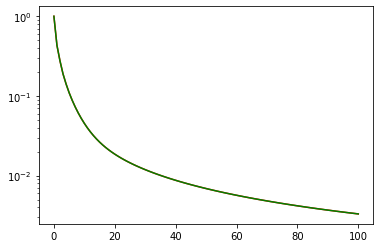

In [36]:
# Posso scegliere un qualunque vettore iniziale
n = A.shape[0]
x0 = np.zeros((n, 1))

# se 0 < omega < 1, il metodo di GS non ha convergenza
# se omega > 1, il metodo di GS converge lentamente
omega = 1.4
# la tolleranza e il numero max di iterazioni li impostiamo perchè il
# metodo converge ad una soluzione, non trova la soluzione al sistema
# lineare. Solitamente si basa su una percentuale di errore da cui
# sono affetti i dati.
itmax = 100
toll = 1e-8

xG, itG, err_vetG = gauss_seidel_sor2(A, b, x0, omega, toll, itmax)
#print("Soluzione GSS:    ", xG)
print("Iterazioni GSS:   ", itG)

plt.semilogy(np.arange(itG), err_vetG,'r')
plt.show()


In [ ]:
def gauss_seidel_sor2(A, b, x0, toll, itmax,omega):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)

    M_omega = D + omega * E
    N_omega = (1 - omega) * D - omega * F
    T_omega = np.dot(np.linalg.inv(M_omega), N_omega)
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = invM @ N
    q = invM @ b

    autovalori = np.linalg.eigvals(T_omega)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)

    it = 0
    x_old = x0.copy()
    x_new = x0.copy()
    er_vet = []

    while it <= itmax and errore >= toll:
        x_tilde = T@x_old+q
        x_new = (1 - omega) * x_old + omega * x_tilde
        
        errore = np.linalg.norm(x_new - x_old) / np.linalg.norm(x_new)
        er_vet.append(errore)
        x_old = x_new.copy()
        it += 1
    return x_new, er_vet, it


### Gradiente

In [15]:
def steepestdescent(A, b, x0, itmax, toll):
    # Definisco l'approssimazione iniziale della soluzione.
    x = x0

    # Calcolo il residuo ...
    r = A.dot(x) - b

    # ... che poi imposto come direzione di discesa.
    p = -r

    # Definisco l'errore di partenza e altre cose che
    # mi serviranno per dare il via al cuore dell'
    # algoritmo.
    norm_b = np.linalg.norm(b)
    errore = np.linalg.norm(r) / norm_b
    vec_sol = []
    vec_sol.append(x)
    vet_residuo = []
    vet_residuo.append(errore)

    # Il metodo della discesa ripida ha come caratteristica
    # particolare di scegliere la direzione p k-esima come
    # l’antigradiente della F calcolato nell’iterato
    # k-esimo, che in questo caso è letta come la direzione
    # di massima decrescita.
    it = 0
    while errore >= toll and it < itmax:
        it += 1

        # Scelta dello step size: per ottenere il minimo
        # valore possibile del gradiente lungo la
        # direzione scelta.
        A_p = A.dot(p)
        rTr = np.dot(r.T, r)
        alpha = rTr / np.dot(p.T, A_p)

        # Aggiorno l'iterato.
        x = x + alpha * p
        r = r + alpha * A_p

        # Salvo i dati per l'output.
        vec_sol.append(x)
        errore = np.linalg.norm(r) / norm_b
        vet_residuo.append(errore)

        # "Discendo".
        p = -r

    return x, vet_residuo, vec_sol, it


Condizionameto di A 7303.551123803752
Iterazioni Gradiente  10000


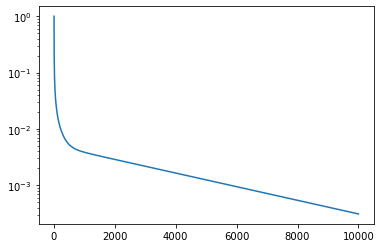

In [16]:
# Indice di condizionamento della matrice A: indica
# quanto e' lenta la convergenza.
print("Condizionameto di A", np.linalg.cond(A))

toll = 1e-8
it_max = 10000
x0 = np.zeros_like(b)

# Dal grafico si nota carattere a zigzag del metodo
# del gradiente, dovuto al fatto che il gradiente di
# una iterata è ortogonale al gradiente di quello
# precedente. Nonostante la convergenza dell'algoritmo,
# questo è relativamente lento a causa di questo
# avanzamento a zig zag.
x_gr, vet_r_gr, vec_sol_gr, itG = steepestdescent(A, b, x0, it_max, toll)
print("Iterazioni Gradiente ", itG)

plt.semilogy(np.arange(itG + 1), vet_r_gr)


### Gradiente Coniugato

In [5]:
def conjugate_gradient(A, b, x0, itmax, toll):
    # Definisco l'approssimazione iniziale della soluzione.
    x = x0

    # Calcolo del residuo ...
    r = A.dot(x) - b

    # ... che poi imposto come direzione di discesa.
    p = -r

    # Definisco l'errore di partenza e altre cose che
    # mi serviranno per dare il via al cuore dell'
    # algoritmo.
    norm_b = np.linalg.norm(b)
    errore = np.linalg.norm(r) / norm_b
    vec_sol = []
    vec_sol.append(x)
    vet_residuo = []
    vet_residuo.append(errore)

    # Il metodo del gradiente coniugato, a differenza di
    # quello del gradiente a discesa ripida, non tiene
    # conto solo della direzione del gradiente ma anche
    # di quella che era la direzione scelta nell'iterata
    # precedente.
    # Il numero di iterazioni che occorrono per
    # raggiungere la precisione richiesta e' di gran
    # lunga inferiore alla dimensione del sistema e
    # questo rende il metodo molto utile per problemi
    # di grosse dimensioni.
    it = 0
    while errore >= toll and it < itmax:
        it += 1

        # Scelta dello step size: per ottenere il minimo
        # valore possibile del gradiente lungo la
        # direzione scelta.
        A_p = A.dot(p)
        rtr = np.dot(r.T, r)
        alpha = rtr / np.dot(p.T, A_p)

        # Aggiorno l'iterato tenendo conto sia della
        # direzione del gradiente e sia della iterazione
        # precedente.
        x = x + alpha * p
        r = r + alpha * A_p
        # direzione scelta in modo che punti verso il
        # centro della ellissi di convergenza.
        gamma = np.dot(r.T, r) / rtr

        # Salvo i dati per l'output.
        vec_sol.append(x)
        errore = np.linalg.norm(r) / norm_b
        vet_residuo.append(errore)

        # "Discendo".
        p = -r + gamma * p

    return x, vet_residuo, vec_sol, it


Condizionameto di A 7303.551123803752
Iterazioni Gradiente Coniugato  10000


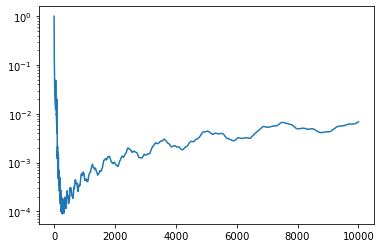

In [13]:
# Indice di condizionamento della matrice A: a differenza
# del metodo dello steepest descent, a parita di indice
# di condizionamento questo risulta più veloce.
print("Condizionameto di A", np.linalg.cond(A))

toll = 1e-8
it_max = 10000
x0 = np.zeros_like(b)

# Dal grafico si nota carattere a zigzag del metodo
# del gradiente coniugato, seppur questo sia molto più
# veloce rispetto a quello dello steepest descent.
x_cg, vet_r_cg, vec_sol_cg, itCG = conjugate_gradient(A, b, x0, it_max, toll)
print("Iterazioni Gradiente Coniugato ", itCG)

plt.semilogy(np.arange(itCG + 1), vet_r_cg)
